# Data Import

In [1]:
# import os, pandas as pd

# # # Add asset from file system

# print(os.environ['DSX_PROJECT_DIR']+'/datasets/filename')

In [2]:
#Code to install Packages. Credits: Mentors Zaishan and Ernest

# 1. Download whl files
# 2. Add it to the part where we add datasets
# 3. Pip install 
# 4. Import

# Install imbalanced-learn
# Download from Download imbalanced-learn from https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl 
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/imbalanced_learn-0.4.3-py3-none-any.whl'

# Install missingno
# Download from: https://pypi.org/project/missingno/#files
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/missingno-0.4.1-py3-none-any.whl'

# Install mlxtend
# Download from: https://pypi.org/project/mlxtend/#files
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/mlxtend-0.15.0.0-py2.py3-none-any.whl'

# Install pydot
# Download from: https://pypi.org/project/pydot/#files
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/pydot-1.4.1-py2.py3-none-any.whl'

In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm as cm
import matplotlib.patches as mpatches # plot t-SNE
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score, auc
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.model_selection import RepeatedKFold 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE # t-SNE

from sklearn import tree
from sklearn.tree import export_graphviz

import lightgbm as lgb

from mlxtend.feature_selection import SequentialFeatureSelector as sfs # feature selection

import seaborn as sns 

from imblearn.over_sampling import SMOTE

from scipy import stats
from scipy.stats import norm
import time # t-SNE model

In [4]:
# #Code to import dataset
# df_raw = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/creditcard-training.csv')

In [5]:
df_raw = pd.read_csv('data/creditcard-training.csv')

# Data Exploration

In [6]:
# Get shape
df_raw.shape

(227844, 32)

In [7]:
# Print head
df_raw.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [8]:
# Get basic statistics about the dataset
df_raw.describe()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
count,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227817.000000,227785.000000,227844.000000,...,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000
mean,79042.504749,90.825317,0.001830,0.049116,-0.005509,0.015160,-0.022870,-0.007268,0.009942,-0.005657,...,0.030540,-0.026843,0.003986,0.027511,0.032867,0.016712,-0.045001,0.076274,-0.001708,0.002219
std,39505.785991,250.504249,0.042742,0.933915,0.885633,0.874173,0.842786,0.820008,0.779124,0.761744,...,1.321420,1.228243,1.209610,8.652541,0.965725,1.019592,1.055865,1.033516,1.093933,1.123424
min,0.000000,0.000000,0.000000,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,...,-26.160506,-43.557242,-73.216718,-14.999725,-19.214325,-5.791881,-18.683715,-4.797473,-24.588262,-13.434066
25%,47694.000000,6.000000,0.000000,-0.543185,-0.478638,-0.457550,-0.514930,-0.478224,-0.202767,-0.225600,...,-0.731719,-0.568948,-0.195151,-7.466957,-0.386010,-0.651170,-0.453237,-0.682527,-0.522697,-0.662053
50%,73261.000000,23.400000,0.000000,0.120841,0.059919,-0.045765,-0.025810,-0.006006,-0.051034,-0.034863,...,-0.237643,0.009785,0.033492,0.044266,0.067860,-0.001631,0.118528,0.030157,-0.093071,-0.067951
75%,120396.000000,79.990000,0.000000,0.724566,0.528866,0.410328,0.476318,0.468337,0.145096,0.168401,...,0.432330,0.532569,0.332266,7.521777,0.509023,0.686509,0.611637,0.835856,0.456881,0.612866
max,145245.000000,19656.530000,1.000000,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,...,22.529298,36.877368,20.007208,14.999989,10.526766,4.569009,7.848392,12.018913,23.745136,15.594995


In [9]:
# Rename the Fraud column
df_raw = df_raw.rename( {'Fraud? (1: Fraud, 0:  No Fraud)' : 'Fraud'}, axis=1)
df_raw.head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [10]:
# Get NAs 
df_raw[df_raw.isnull().any(axis=1)].head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
10,10,7.80,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,...,-0.629152,-1.423236,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408
16,12,12.99,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,...,0.288069,-0.586057,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333
25,22,26.43,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,...,-0.959537,0.543985,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664
28,23,33.00,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,...,-0.200331,0.740228,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392
42,33,14.80,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,...,0.119168,0.850893,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501


# Exploratory Data Analysis for Outlier Detection

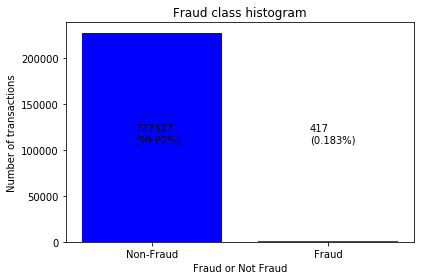

In [11]:
# Checking the Target Classes

plt.bar(['Non-Fraud','Fraud'], df_raw['Fraud'].value_counts(), color=['b','r'])
plt.title("Fraud class histogram")
plt.xlabel('Fraud or Not Fraud')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df_raw['Fraud'].value_counts()[0], 
                                         df_raw['Fraud'].value_counts()[0]/df_raw['Fraud'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df_raw['Fraud'].value_counts()[1], 
                                         df_raw['Fraud'].value_counts()[1]/df_raw['Fraud'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

<div class="alert alert-danger">
    The historgram shows that there is a need for resampling 
</div>

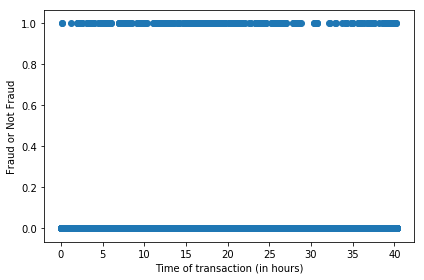

In [12]:
plt.scatter(df_raw['Seconds since reference time']/(60*60), df_raw['Fraud'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Fraud or Not Fraud')

plt.tight_layout()

plt.show()

<div class="alert alert-danger">
The "Seconds since reference time" variable isn't a good predictor for frauds. As seen above, the pattern for both non-fradulent and fraudulent transactions seems to be random regardless of the hour of the day.
</div>

### Looking at the entire dataset

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  25355  (11.13%)


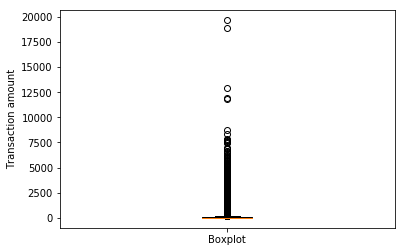

In [13]:
plt.boxplot(df_raw['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df_raw[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

<div class="alert alert-danger">
The interquartile range method found <b>25355</b> outliers, which represents <b>11.13%</b> of the observations. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models.
</div>

In [14]:
df_raw[df_raw['Fraud']==1].where(df_raw['Amount']>upper_bound).count()['Amount']

75

<div class="alert alert-danger">
In addition to that, only 75 out of 25355 outliers are classified as frauds.
</div>

### Now we look at the concentration non-fraudulent and fraudulent transactions.

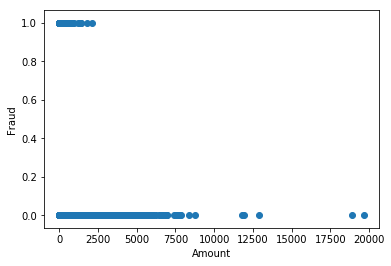

In [15]:
plt.scatter(df_raw['Amount'], df_raw['Fraud'])
plt.xlabel('Amount')
plt.ylabel('Fraud')
plt.show()

<div class="alert alert-success">
    Looks like the Fraudulent transactions are more concentrated towards the lower amounts
</div>

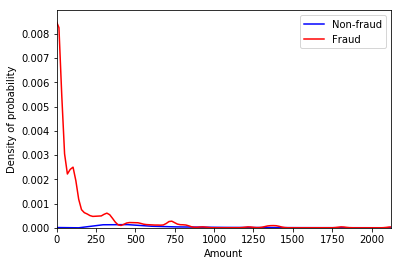

In [16]:
target_0 = df_raw.loc[df_raw['Fraud'] == 0]
target_1 = df_raw.loc[df_raw['Fraud'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(df_raw[df_raw['Fraud']==1]['Amount']))
ax2.set_xlim(0, max(df_raw[df_raw['Fraud']==1]['Amount']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.show()

<div class="alert alert-success">
    Thus, we confirm that the fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions.
</div>

### Looking at detailed Features

In [17]:
tab_info = df_raw.describe()
#Add info on range
tab_info=tab_info.append(pd.DataFrame(df_raw.max()-df_raw.min()).T.rename(index={0:'range (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_raw.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_raw.isnull().sum()/df_raw.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
count,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227817.000000,227785.000000,227844.000000,...,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000,227844.000000
mean,79042.504749,90.825317,0.001830,0.049116,-0.005509,0.015160,-0.022870,-0.007268,0.009942,-0.005657,...,0.030540,-0.026843,0.003986,0.027511,0.032867,0.016712,-0.045001,0.076274,-0.001708,0.002219
std,39505.785991,250.504249,0.042742,0.933915,0.885633,0.874173,0.842786,0.820008,0.779124,0.761744,...,1.321420,1.228243,1.209610,8.652541,0.965725,1.019592,1.055865,1.033516,1.093933,1.123424
min,0.000000,0.000000,0.000000,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,...,-26.160506,-43.557242,-73.216718,-14.999725,-19.214325,-5.791881,-18.683715,-4.797473,-24.588262,-13.434066
25%,47694.000000,6.000000,0.000000,-0.543185,-0.478638,-0.457550,-0.514930,-0.478224,-0.202767,-0.225600,...,-0.731719,-0.568948,-0.195151,-7.466957,-0.386010,-0.651170,-0.453237,-0.682527,-0.522697,-0.662053
50%,73261.000000,23.400000,0.000000,0.120841,0.059919,-0.045765,-0.025810,-0.006006,-0.051034,-0.034863,...,-0.237643,0.009785,0.033492,0.044266,0.067860,-0.001631,0.118528,0.030157,-0.093071,-0.067951
75%,120396.000000,79.990000,0.000000,0.724566,0.528866,0.410328,0.476318,0.468337,0.145096,0.168401,...,0.432330,0.532569,0.332266,7.521777,0.509023,0.686509,0.611637,0.835856,0.456881,0.612866
max,145245.000000,19656.530000,1.000000,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,...,22.529298,36.877368,20.007208,14.999989,10.526766,4.569009,7.848392,12.018913,23.745136,15.594995
range (nb),145245.000000,19656.530000,1.000000,10.324599,22.419744,34.416326,14.539815,12.805499,67.430540,62.033221,...,48.689804,80.434610,93.223927,29.999714,29.741092,10.360890,26.532107,16.816387,48.333399,29.029061
null values (nb),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,59.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<div class="alert alert-success">
We have identified that Features 16, 19, 21, and 22 have an unsually large range as compared to the rest. <br/>
Just to confirm we will be plotting distribution plots
</div>

In [18]:
# V = df_raw[[col for col in df_raw.columns if 'Feature' in col]]

# f, ax = plt.subplots(ncols = 2, nrows = 14, figsize=(15,2*len(V.columns)))


# for i, c in zip(ax.flatten(), V.columns):
#     sns.distplot(V[c], ax = i)

# f.tight_layout()

<div class="alert alert-success">
Most of the features have skewed distribution, we investigate further into the ones which we suspect have anomalies <br/>
Based on the table and the distribution plot above we will investigate into Features 16, 19, 21, and 22
</div>

### Anomaly Detection

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


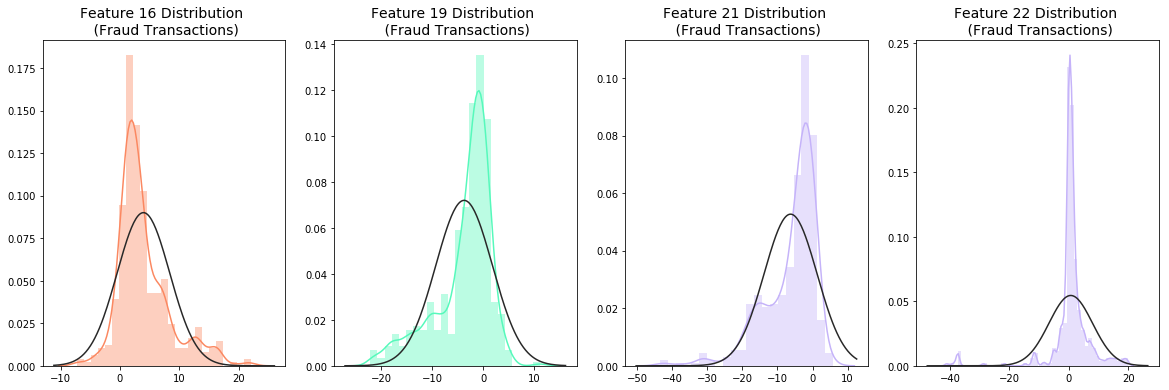

In [19]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

v7_fraud_dist = df_raw['Feature 16'].loc[df_raw['Fraud'] == 1].values
sns.distplot(v7_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Feature 16 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = df_raw['Feature 19'].loc[df_raw['Fraud'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Feature 19 Distribution \n (Fraud Transactions)', fontsize=14)

v21_fraud_dist = df_raw['Feature 21'].loc[df_raw['Fraud'] == 1].values
sns.distplot(v21_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Feature 21 Distribution \n (Fraud Transactions)', fontsize=14)

v22_fraud_dist = df_raw['Feature 22'].loc[df_raw['Fraud'] == 1].values
sns.distplot(v22_fraud_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Feature 22 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

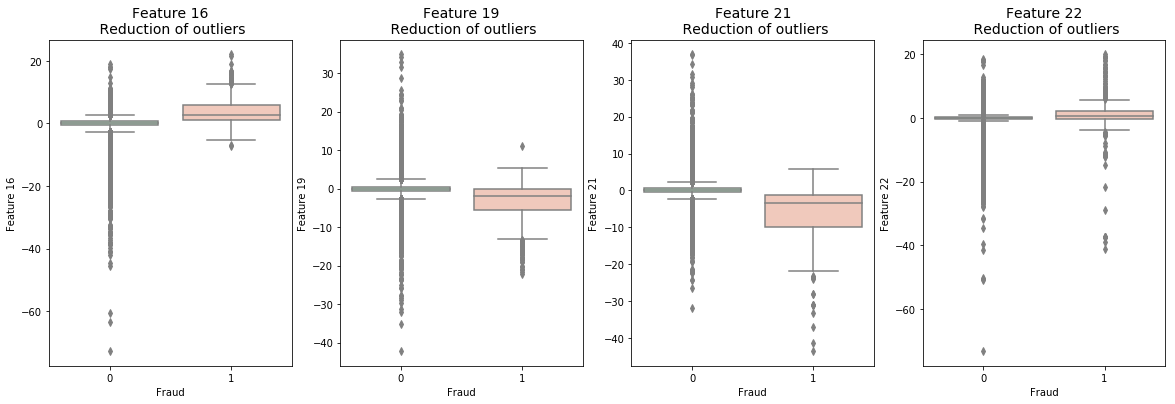

In [20]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

# Feature 16
sns.boxplot(x="Fraud", y="Feature 16", data=df_raw,ax=ax1, palette=colors)
ax1.set_title("Feature 16\n Reduction of outliers", fontsize=14)

# Feature 19
sns.boxplot(x="Fraud", y="Feature 19", data=df_raw, ax=ax2, palette=colors)
ax2.set_title("Feature 19\n Reduction of outliers", fontsize=14)

# Feature 21
sns.boxplot(x="Fraud", y="Feature 21", data=df_raw, ax=ax3, palette=colors)
ax3.set_title("Feature 21\n Reduction of outliers", fontsize=14)

# Feature 22
sns.boxplot(x="Fraud", y="Feature 22", data=df_raw, ax=ax4, palette=colors)
ax4.set_title("Feature 22\n Reduction of outliers", fontsize=14)


plt.show()

### We will check for outliers in both fraud and non fraud category

In [21]:
#Get difference in means between Fraud and not-fraud
df_raw.groupby('Fraud').mean()

,Seconds since reference time,Amount,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
Fraud,,,,,,,,,,,,,,,,,,,,,
0,79064.020002,90.761453,0.049387,0.002841,0.028799,-0.018164,-0.008677,0.009279,-0.007071,-0.022976,...,0.033086,-0.015406,0.002776,0.026436,0.045807,0.016831,-0.032826,0.068994,0.009538,0.007167
1,67308.333333,125.656379,-0.098209,-4.559229,-7.423533,-2.589217,0.766809,0.374396,0.765659,0.013088,...,-1.357987,-6.264641,0.663762,0.613894,-7.024019,-0.048627,-6.685076,4.046820,-6.135121,-2.696376


<div class="alert alert-danger">
We can observe that certain variables (like `Feature 3`, and `Feature 24`) are drastically different for fraud and non-fraud categories
</div>

## Data Transformation

### Scaling

Since the value of amount and time have a very different scale from the rest, we should consider normalising the columns "Amount" and "Seconds since reference time"

In [22]:
df = df_raw.copy()

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Seconds since reference time'].values.reshape(-1, 1))
df = df.drop(['Amount'],axis=1)
df.head()
df = df.drop(['Seconds since reference time'],axis=1)

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Handle Missing Values

We will be looking for missing values

In [23]:
df[df.isnull().any(axis=1)].head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
10,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,0.313894,0.027740,...,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408,-0.331433,-2.000534
16,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,0.196002,0.013802,...,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333,-0.310715,-2.000484
25,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,-0.227404,0.742435,...,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664,-0.257063,-2.000231
28,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,0.457331,-0.038500,...,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392,-0.230836,-2.000205
42,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,0.258315,-0.264775,...,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501,-0.303490,-1.999952


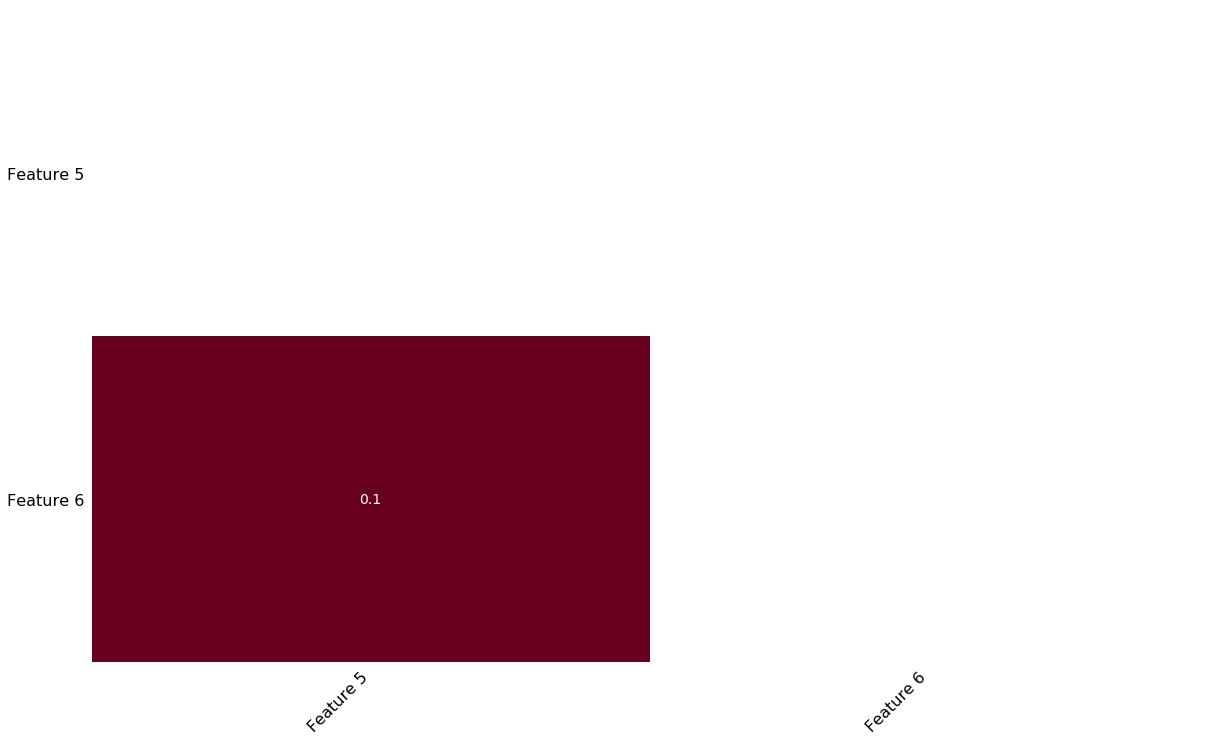

In [24]:
#Visualise the Correleation Matrix about the locations of missing values in columns 
msno.heatmap(df)


<div class="alert alert-success">
This heatmap signifies that the missing values in features 5 and 6 are correlated to each other and they are  `Missing Not at Random` (MNAR) <br/>
Therefore, dropping the rows will make the model biased and we will be using `Imputation` instead
</div>

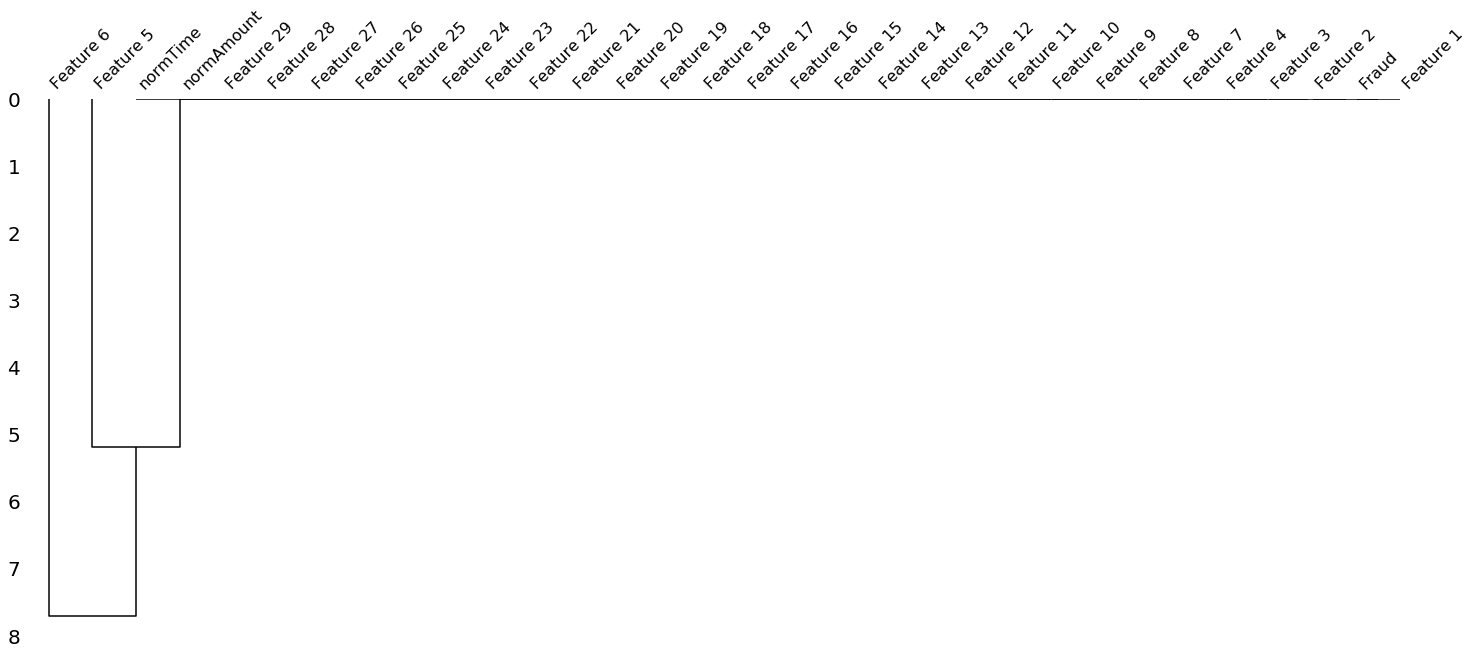

In [25]:
msno.dendrogram(df)

In [26]:
#Use sklearn Impute to impute missing values
features = df.values
imp = SimpleImputer(missing_values = np.nan, strategy='mean')

#Only feature 5 and feature 6 have NaN
features[:,[5,6]] = imp.fit_transform(features[:,[5,6]])

df1 = pd.DataFrame(features)
df1.columns = df.columns
df = df1

#Check whether we've left out any null variables

df[df.isnull().any(axis=1)]

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime


In [27]:
#Get number of fraud and not fraud values
fraud_rows = df['Fraud'].value_counts()
total_rows = df.shape[0]
percentage_fraud = fraud_rows[1]/total_rows

print("Fraud rows: ", fraud_rows[1])
print("Total rows: ", total_rows)
print("Percentage rows: ", percentage_fraud)

Fraud rows:  417
Total rows:  227844
Percentage rows:  0.0018301996102596514


### Check for Duplicates

In [28]:
df[df.duplicated()==True]

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime


<div class="alert alert-success">
There are no duplicates. So we can move on.
</div>

### T-SNE

We will be applying t-SNE (t-Distributed Stochastic Neighbor Embedding) to ensure that the data can now be split into fraudulent and non-fraudulent transactions

In [29]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 417 rows.
fraud_df = df.loc[df['Fraud'] == 1]
non_fraud_df = df.loc[df['Fraud'] == 0][:417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,normAmount,normTime
164508,0.0,-1.606312,0.524222,-0.943494,1.211262,-0.213519,0.504834,0.443954,1.076930,0.366793,...,0.565710,-13.359156,-0.871633,0.366353,0.819329,-0.456930,-0.980670,0.678264,0.751185,0.955014
18364,0.0,-0.344852,1.475065,-0.077678,-0.444574,0.830956,0.378466,0.418788,0.980467,-0.273695,...,0.119867,-0.233538,-0.585791,0.622807,0.325711,0.907876,0.606884,-0.406830,0.183928,-1.256009
6820,1.0,-0.438082,-3.694516,-6.304753,-1.267587,0.357987,0.500779,0.645103,-0.503529,-0.000523,...,1.703538,-1.496901,-7.506169,0.449930,-8.601648,6.353612,-6.716720,-1.305279,-0.358579,-1.782743
61835,0.0,-0.047284,0.791957,-0.922571,0.006391,-0.096053,0.008266,-0.010516,-0.034875,-0.219228,...,0.630332,-12.573775,0.332371,1.157665,0.921974,0.240965,-0.698881,-0.720950,-0.362571,-0.734945
222133,1.0,-0.517959,-4.239087,-9.250635,-2.434828,1.987386,-0.320541,0.786787,0.893065,1.034907,...,1.517016,0.623865,-4.571268,1.547380,-3.489375,2.731576,-3.754054,-1.775833,0.215465,1.614893


In [30]:
# New_df is from the random undersample data (fewer instances)
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

X = new_df.drop('Fraud', axis=1)
y = new_df['Fraud']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 1.4e+01 s


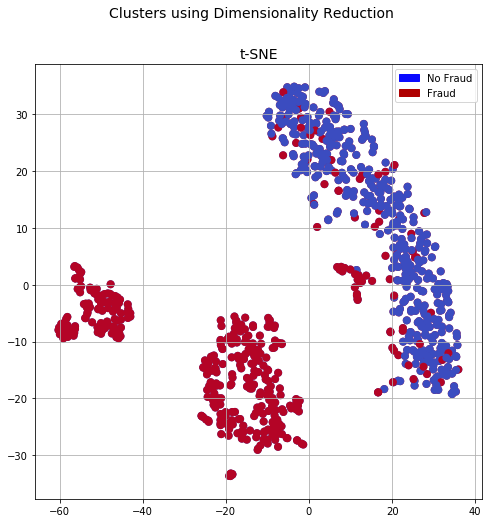

In [31]:
f, ax1 = plt.subplots(1, 1, figsize=(8,8))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

<div class="alert alert-success">
t-SNE tells us if our prediction model will correctly able to cluster our training set datapoints correctly <br/>
From the plot above, we can see that the data can be classified into fraud and non-fraud and thus, we will be moving forward with it
</div>

## Feature Selection

### Correlation Matrix

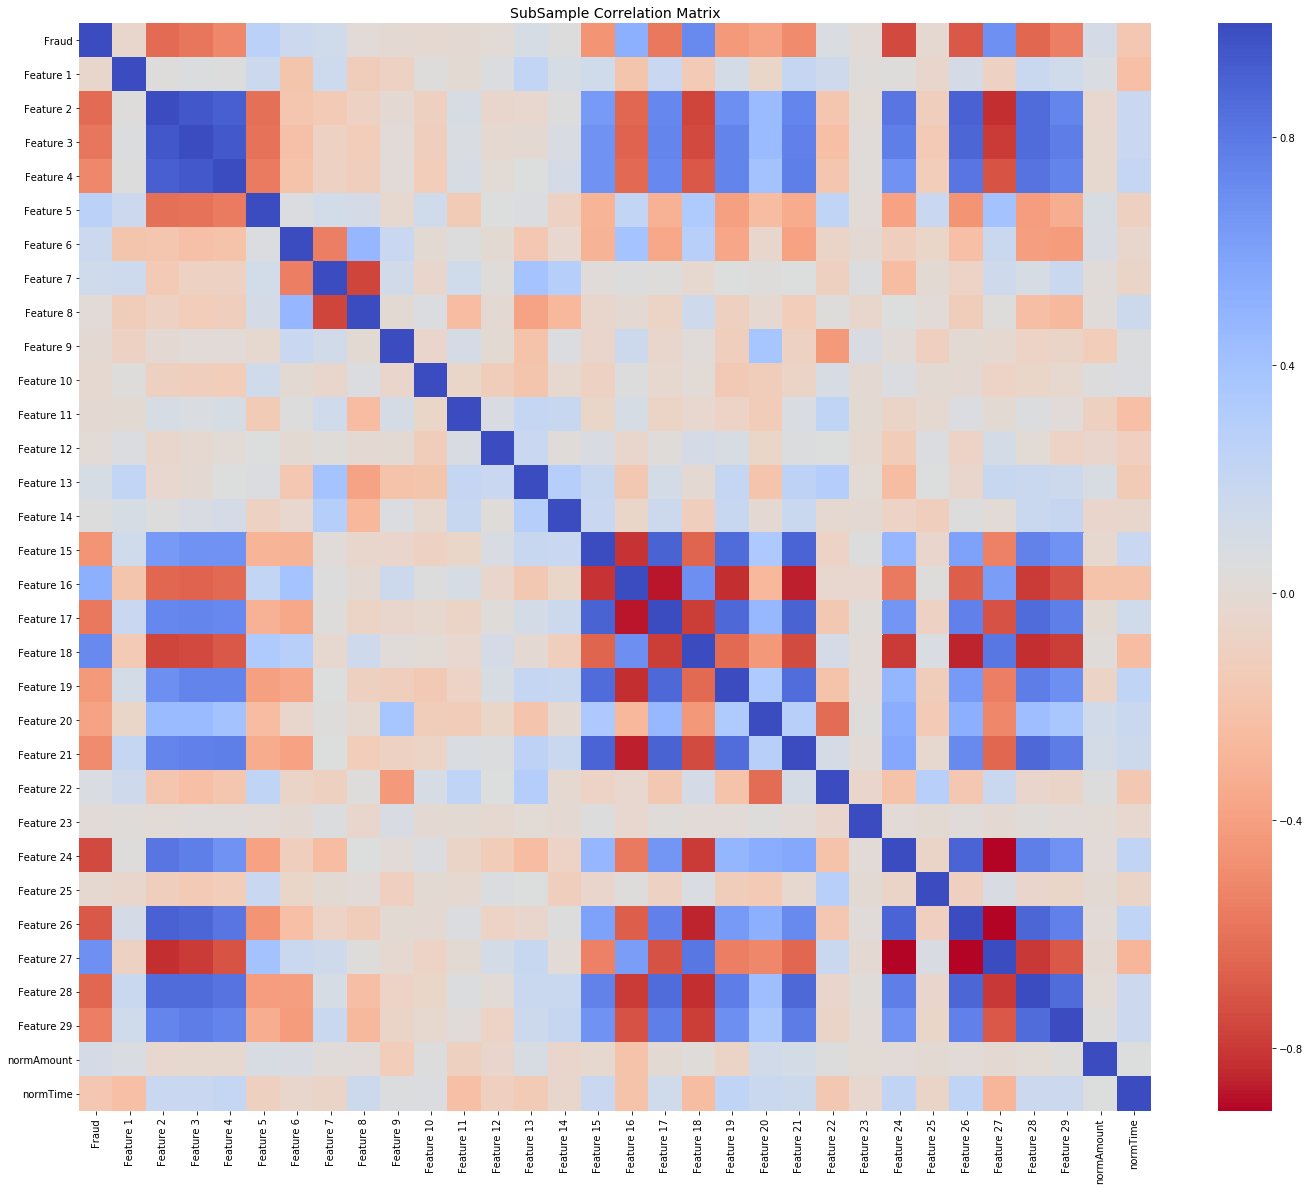

In [32]:
# Shuffle dataframe rows
df_sample = normal_distributed_df.sample(frac=1, random_state=42)

f, ax1 = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = df_sample.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

<div class="alert alert-success">
We can see below that all features have very low correlation with the 'Fraud' feature. This was already expected since the data was processed using PCA.

<b>Negative Correlations</b>: Features (7 and 8), (15 and 16), (16 and 17), (16 and 21), (24 and 27), (26 and 27) are negatively correlated. <br/>
<b>Positive Correlations</b>:Features (2,3, and 4), (2 and 26), (15 and 21) are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
</div>

So now we will be removing features 7, 16, 27, 2, 21

In [33]:
normal_distributed_df.drop(['Feature 2', 'Feature 3', 'Feature 7', 'Feature 16', 'Feature 18', 'Feature 21', 'Feature 27'], axis=1, inplace=True)
df.drop(['Feature 2', 'Feature 3', 'Feature 7', 'Feature 16', 'Feature 18', 'Feature 21', 'Feature 27'], axis=1, inplace=True)

## Adaboost

In [34]:
y_small = normal_distributed_df['Fraud']
X_small = normal_distributed_df.drop('Fraud', axis=1)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, train_size=0.8, random_state=0)

#These will be used for model evaluation
y = df['Fraud']
X = df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
# Adaboost
abc = AdaBoostClassifier(n_estimators=17, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9988369286137506


## Random Forest - Forward Selection

We will be using Random Forest to get the important features

In [37]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=24, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=20,  #20 has been chosen after multiple trial-errors
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy')

# Perform SFFS
sfs1 = sfs1.fit(X_train_small, y_train_small)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   30.0s finished

[2019-03-26 10:42:01] Features: 1/20 -- score: 0.8755444165970481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   22.0s finished

[2019-03-26 10:42:23] Features: 2/20 -- score: 0.9220941241993874[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   21.4s finished

[2019-03-26 10:42:44] Features: 3/20 -- score: 0.934146477304372[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [38]:
# Get the features that were selected as predictors
# feat_cols = list(sfs1.k_feature_idx_)
# print(feat_cols)

feat_cols = [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23]
#Therefore, the selected features are: [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23]

In [39]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=24, random_state=42)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.10f' % f1_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.10f' % f1_score(y_test, y_test_pred))

Training accuracy on selected features: 0.9880952381
Testing accuracy on selected features: 0.8208955224


In [40]:
X_train = X_train.iloc[:, feat_cols]
X_test = X_test.iloc[:, feat_cols]

# Data Resampling

In [41]:
#We'll keep the ratio for Fraud 2:3 such that it is balanced enough to train the model without creating too many synthetic points
method = SMOTE(sampling_strategy=0.67, kind='regular')

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [42]:
print("Before resampling")
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print("After resampling")
print(pd.value_counts(pd.Series(y_resampled)))

Before resampling
0.0    227427
1.0       417
Name: Fraud, dtype: int64
After resampling
0.0    181935
1.0    121896
dtype: int64


# Models to detect Fraud

### LightGBM

In [ ]:
train_data=lgb.Dataset(X_resampled, label=y_resampled)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.5s


In [50]:
print(classification_report(y_test, predictions_lgbm_01))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45492
         1.0       0.90      0.70      0.79        77

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.95      0.85      0.89     45569
weighted avg       1.00      1.00      1.00     45569



## Logistic Regression

In [45]:
# Continue fitting the model and obtain predictions
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Get your performance metrics
predicted = model_lr.predict(X_test)

# Predict probabilities
probs = model_lr.predict_proba(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F1 SCORE", f1_score(y_test, predicted))

C:\Users\Muskaan Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45492
         1.0       0.93      0.65      0.76        77

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.96      0.82      0.88     45569
weighted avg       1.00      1.00      1.00     45569

Confusion matrix:
 [[45488     4]
 [   27    50]]
F1 SCORE 0.7633587786259541


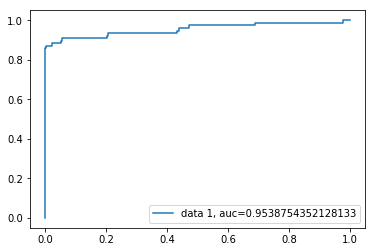

In [46]:
#Printing ROC Curve that shows tradeoff between Sensitivity and Specificity 
probs = model_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  probs)
auc_score = roc_auc_score(y_test, probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_score))
plt.legend(loc=4)
plt.show()


In [47]:
#Get coefficients and feature values of logistic regression
model_lr.coef_

array([[-0.18267613, -0.0082377 ,  0.14547556, -0.19545687,  0.31566161,
        -0.08642031,  0.08866841, -0.15360692,  0.10172908, -0.34258484,
        -0.1124627 , -0.02223688, -0.04459658,  0.10480595, -0.0801748 ,
        -0.09509178,  0.02085097, -0.77082451, -0.23165142, -0.1261989 ,
        -0.47447326, -0.34690479,  0.18592305, -0.13495233]])

In [45]:
X_test.columns

Index(['Feature 1', 'Feature 4', 'Feature 5', 'Feature 8', 'Feature 9',
       'Feature 10', 'Feature 11', 'Feature 12', 'Feature 14', 'Feature 15',
       'Feature 17', 'Feature 19', 'Feature 20', 'Feature 22', 'Feature 23',
       'Feature 24', 'Feature 26', 'Feature 29', 'normAmount', 'normTime'],
      dtype='object')

## Decision Tree 

In [46]:
model_dt = DecisionTreeClassifier(random_state=5)

# Fit the model to our resampled dataset
model_dt.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_dt.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_dt.predict_proba(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F1 SCORE", f1_score(y_test, predicted))
print('AUC Score: ',roc_auc_score(y_test, probs[:,1]))

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45480
         1.0       0.36      0.80      0.49        89

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.68      0.90      0.75     45569
weighted avg       1.00      1.00      1.00     45569

Confusion matrix:
 [[45353   127]
 [   18    71]]
F SCORE 0.49477351916376305
AUC Score:  0.897480186376528


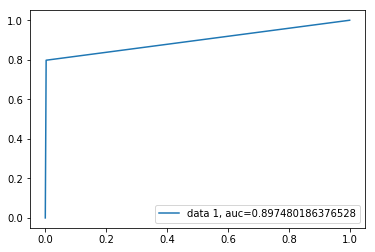

In [47]:
#Printing ROC Curve that shows tradeoff between Sensitivity and Specificity 
probs = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  probs)
auc_score = roc_auc_score(y_test, probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_score))
plt.legend(loc=4)
plt.show()


## Random Forest

### Parameter tuning for Random Forest

### Get number of estimators

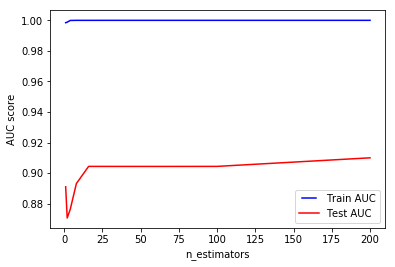

In [52]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_resampled, y_resampled)
    train_pred = rf.predict(X_resampled)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

<div class="alert alert-success">
Therefore, we can see that once we cross 24, there's no increase in AUC if we increase the number of estimators. 
</div>

In [53]:
# Define the model as the random forest
model_rf_re = RandomForestClassifier(n_estimators=24,random_state=5, criterion='entropy')

# Fit the model to our resampled dataset
model_rf_re.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_rf_re.predict(X_test)

# Predict probabilities
probs = model_rf_re.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F1 SCORE", f1_score(y_test, predicted))
print("AUC Score: ",roc_auc_score(y_test, probs[:,1]))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45480
         1.0       0.89      0.82      0.85        89

   micro avg       1.00      1.00      1.00     45569
   macro avg       0.94      0.91      0.93     45569
weighted avg       1.00      1.00      1.00     45569

[[45471     9]
 [   16    73]]
F SCORE 0.8538011695906433
AUC Score:  0.9686999100728312


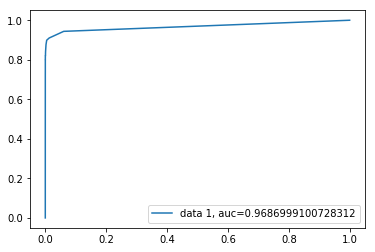

In [54]:
#Printing ROC Curve that shows tradeoff between Sensitivity and Specificity 
probs = model_rf_re.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  probs)
auc_score = roc_auc_score(y_test, probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_score))
plt.legend(loc=4)
plt.show()


<div class="alert alert-success">
    <h2> Model Selected ! </h2>
    <br/>
    Therefore, we can see that Random Forest has the best AUC score and the best F-score <br/>
    We will be using this as our final predictors
</div>

### Create a pruned Random tree to print the rules

<div class="alert alert-danger">
    The pruned tree image was created on local and images have been uploaded
</div>

In [55]:
# Do not need to prune again
# The images are available in the slides and on local

# Define the model as the random forest
# model_rf_pruned = RandomForestClassifier(n_estimators=24,random_state=5, max_depth=3, criterion='entropy')

# # Fit the model to our resampled dataset
# model_rf_pruned.fit(X_resampled, y_resampled)

# # Obtain predictions from the test data 
# predicted = model_rf_pruned.predict(X_test)

# # Predict probabilities
# probs = model_rf_pruned.predict_proba(X_test)

# # Print the ROC curve, classification report and confusion matrix
# print("AUC Score: ",roc_auc_score(y_test, probs[:,1]))

AUC Score:  0.9776007233701935


In [57]:
#printing one decision tree in the Random Forest
# The images are available in the slides and on local

# estimator = model_rf_pruned.estimators_[5]

# tree.export_graphviz(estimator, out_file='tree.dot', feature_names=X_train.columns,
#                     class_names = ['Non-Fraud', 'Fraud']) #produces dot file
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('images/random_forest_pruned_5.png')

In [58]:
#printing one decision tree in the Random Forest
# The images are available in the slides and on local

# estimator = model_rf_pruned.estimators_[2]

# tree.export_graphviz(estimator, out_file='tree.dot', feature_names=X_train.columns,
#                     class_names = ['Non-Fraud', 'Fraud']) #produces dot file
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('images/random_forest_pruned_2.png')

In [59]:
#printing one decision tree in the Random Forest
# The images are available in the slides and on local

# estimator = model_rf_pruned.estimators_[20]

# tree.export_graphviz(estimator, out_file='tree.dot', feature_names=X_train.columns,
#                     class_names = ['Non-Fraud', 'Fraud']) #produces dot file
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('images/random_forest_pruned_20.png')

In [60]:
#printing one decision tree in the Random Forest
# The images are available in the slides and on local

# estimator = model_rf_pruned.estimators_[15]

# tree.export_graphviz(estimator, out_file='tree.dot', feature_names=X_train.columns,
#                     class_names = ['Non-Fraud', 'Fraud']) #produces dot file
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('images/random_forest_pruned_15.png')

# Further Evaluation Metrics

## Plot learning curve

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


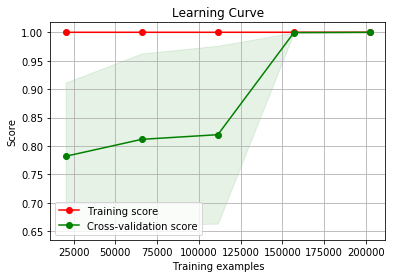

In [62]:
#Generate a simple plot of the test and training learning curve.
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title= "Learning Curve"
plot_learning_curve(model_rf_re, title, X_resampled, y_resampled)

plt.show()

<div class="alert alert-success">
From the learning curve, we can see that the bias-variance trade-off is good and we'll continue with this model
</div>

## Cross Validation

In [88]:
n_repeats = 5
n_splits=5
kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=None) 


model_rf_re = RandomForestClassifier(random_state=5)
auc_scores = []
f1_scores = []

i=1
for train_index, test_index in kf.split(X):
    
    print("Iteration: ", i)
    i+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Fit the model to our resampled dataset
    model_rf_re.fit(X_train, y_train)

    # Obtain predictions from the test data 
    predicted = model_rf_re.predict(X_test)

    # Predict probabilities
    probs = model_rf_re.predict_proba(X_test)
    auc_scores.append(roc_auc_score(y_test, probs[:,1]))
    f1_scores.append(f1_score(y_test, predicted))

Iteration:  1


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25


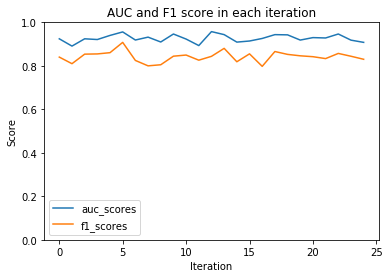

In [90]:
plt.plot(range(0,n_repeats*n_split,1), auc_scores, label='auc_scores')
plt.plot(range(0,n_repeats*n_split,1), f1_scores, label='f1_scores')
plt.ylim(0, 1)
plt.title('AUC and F1 score in each iteration')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()
plt.show()

<div class="alert alert-success">
Thus, by the minimal fluctuation in F1-scores and AUC scores, we can confirm a lack of overfitting/underfitting
</div>

# Final Predicted Output

In [64]:
predicted_df = X_test.copy()
predicted_df['predicted_fraud'] = predicted
predicted_df['actual_fraud'] = y_test

In [ ]:
# predicted_df.to_csv('data/predicted.csv')

In [65]:
predicted_df.head()

,Feature 1,Feature 4,Feature 5,Feature 6,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,...,Feature 23,Feature 24,Feature 25,Feature 26,Feature 28,Feature 29,normAmount,normTime,predicted_fraud,actual_fraud
105411,0.346831,0.358405,-0.081905,-0.138437,-0.035880,-0.032120,0.304226,0.502897,-0.455232,0.016608,...,-14.592011,0.575452,-0.281398,0.784795,0.171567,-0.168710,-0.334827,-0.241370,0.0,0.0
43907,-1.469273,-1.024389,0.606221,0.253807,0.961790,-0.086345,0.015489,-0.227675,-0.417816,-0.208488,...,-7.192270,-0.869912,-0.694709,-0.668974,1.589140,-0.401346,-0.322651,-0.945294,0.0,0.0
3454,0.538860,0.155043,-0.239691,-0.066504,0.730497,-0.240774,0.200218,-0.093586,-0.836212,0.244727,...,-10.821399,0.532227,-1.438818,0.490027,-0.993509,0.720051,-0.358579,-1.926342,0.0,0.0
8370,-0.047179,-0.514707,-0.021518,-0.000508,0.842736,-0.118886,0.154366,0.318464,-0.064177,-0.023517,...,13.675790,1.851807,-0.450640,-3.479167,0.425465,0.705855,-0.058703,-1.717486,0.0,0.0
107078,-1.192511,0.471704,1.720929,0.179997,0.007871,-0.241240,0.025725,0.373111,0.355152,0.007894,...,-7.757046,-0.176926,-0.768573,0.155934,0.606294,-0.772423,-0.326164,-0.221955,0.0,0.0
